In [1]:
import numpy as np
from matplotlib import pyplot as plt
import pickle
import pandas as pd

## Load Important Function

In [2]:
class Data:
    def __init__(self, array_list):
        self.array_list = array_list

    def save(self, filename):
        with open(filename, 'wb') as f:
            pickle.dump(self.array_list, f)

    @classmethod
    def load(cls, filename):
        with open(filename, 'rb') as f:
            array_list = pickle.load(f)
        return cls(array_list)

## Plain MD 

In [50]:
results_trials = []
ntrials = 5
nres = 3
plain_md_path = '../Plain_MD/analysis'

# Load the data
for trial in range(ntrials):
    data = Data.load(f'{plain_md_path}/autocoorel_data/autocorrel_res012_2us_trial{trial}.pkl').array_list
    results_trials.append(data)

# Determine the minimum length among all (trial, res)
min_len = min(len(res_data) for trial_data in results_trials for res_data in trial_data)
print(f"Minimum length of data across all trials and residues: {min_len}")

# Store truncated results
results = np.zeros((ntrials, nres, min_len))
for trial in range(ntrials):
    for res in range(nres):
        results[trial, res, :] = results_trials[trial][res][:min_len]  # truncate to min_len

# Calculate mean and std
plainmd_results_mean = np.mean(results, axis=0)
plainmd_results_std = np.std(results, axis=0)

Minimum length of data across all trials and residues: 155167


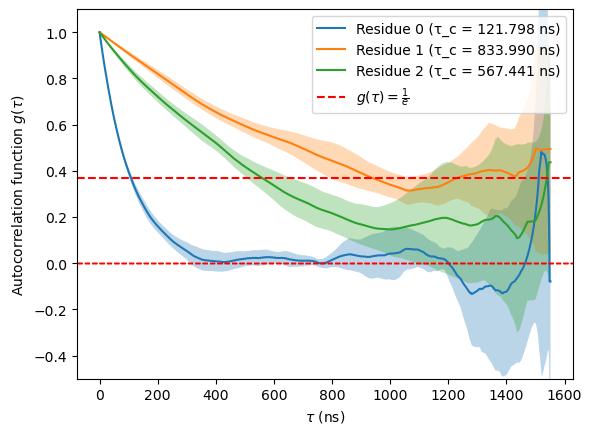

In [81]:
ntau = plainmd_results_mean.shape[1] # 37002
dt_in_ns = 0.010  # 10 ps per step (converted to ns) 
Nmax = min_len
time = np.arange(Nmax) * dt_in_ns  # Time array in ns

plt.figure()

for res in range(nres):
    mean = plainmd_results_mean[res][:Nmax]
    std = plainmd_results_std[res][:Nmax]
    # Calculate tau_c
    tau_c = np.sum(mean) * dt_in_ns
    label = f'Residue {res} (τ_c = {tau_c:.3f} ns)'

    plt.plot(time, mean, label=label)
    plt.fill_between(time, mean - std, mean + std, alpha=0.3)
    plt.axhline(0, color='red', linestyle='--', linewidth=1)

# Add a red vertical line at 1/e
tau_1e = 1 / np.e  # Compute 1/e
plt.axhline(y=tau_1e, color='r', linestyle='--', label=r'$g(\tau) = \frac{1}{e}$')
plt.ylim(-0.5,1.1)
plt.xlabel(r'$\tau$ (ns)')
plt.ylabel(r'Autocorrelation function $g(\tau)$')
plt.legend(loc='best')

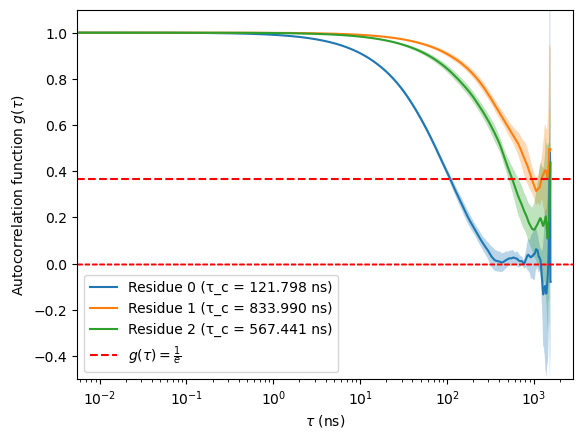

In [82]:
ntau = plainmd_results_mean.shape[1] # 37002
dt_in_ns = 0.010  # 10 ps per step (converted to ns) 
Nmax = min_len
time = np.arange(Nmax) * dt_in_ns  # Time array in ns

plt.figure()

for res in range(nres):
    mean = plainmd_results_mean[res][:Nmax]
    std = plainmd_results_std[res][:Nmax]
    # Calculate tau_c
    tau_c = np.sum(mean) * dt_in_ns
    label = f'Residue {res} (τ_c = {tau_c:.3f} ns)'

    plt.plot(time, mean, label=label)
    plt.fill_between(time, mean - std, mean + std, alpha=0.3)
    plt.axhline(0, color='red', linestyle='--', linewidth=1)

# Add a red vertical line at 1/e
tau_1e = 1 / np.e  # Compute 1/e
plt.axhline(y=tau_1e, color='r', linestyle='--', label=r'$g(\tau) = \frac{1}{e}$')
plt.ylim(-0.5,1.1)
plt.xlabel(r'$\tau$ (ns)')
plt.xscale('log')  # Change x-axis to log scale
plt.ylabel(r'Autocorrelation function $g(\tau)$')
plt.legend(loc='best')

## EE

In [47]:
ee_path = '../EE/analysis'

# Define number of trials and residues
ntrials = 5
nres = 3  # Number of residues

# Load autocorrelation data from each trial
results_trials = []

for trial in range(ntrials):    
    with open(f'{ee_path}/autocoorel_data/autocorrel_res012_1us_trial{trial}.pkl', 'rb') as f:
        results_trials.append(pickle.load(f))  # Load the stored data

# Determine the maximum `tau` length across all trials
max_ntau = max([len(trial[0]) for trial in results_trials])

# Initialize results array with NaNs (to handle variable-length data)
results = np.full((ntrials, nres, max_ntau), np.nan)

# Store all results, padding shorter arrays with NaN
for trial in range(ntrials):
    for res in range(nres):
        ntau_current = len(results_trials[trial][res])
        results[trial, res, :ntau_current] = results_trials[trial][res]  # Fill valid values

# Compute mean and standard deviation across trials, ignoring NaNs
ee_results_mean = np.nanmean(results, axis=0)  # (nres, max_ntau)
ee_results_std = np.nanstd(results, axis=0)

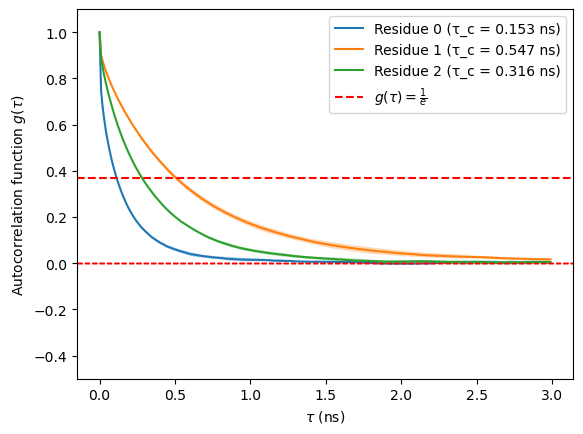

In [54]:
ntau = ee_results_mean.shape[1] # 37002
dt_in_ns = 0.010  # 10 ps per step (converted to ns)
time_to_plot = 3 # in ns 
Nmax = int(time_to_plot / dt_in_ns)  # Convert ns to index\
time = np.arange(Nmax) * dt_in_ns  # Time array in ns

plt.figure()

for res in range(nres):
    mean = ee_results_mean[res][:Nmax]
    std = ee_results_std[res][:Nmax]
    # Calculate tau_c
    tau_c = np.sum(mean) * dt_in_ns
    label = f'Residue {res} (τ_c = {tau_c:.3f} ns)'

    plt.plot(time, mean, label=label)
    plt.fill_between(time, mean - std, mean + std, alpha=0.3)
    plt.axhline(0, color='red', linestyle='--', linewidth=1)

# Add a red vertical line at 1/e
tau_1e = 1 / np.e  # Compute 1/e
plt.axhline(y=tau_1e, color='r', linestyle='--', label=r'$g(\tau) = \frac{1}{e}$')
plt.ylim(-0.5,1.1)
plt.xlabel(r'$\tau$ (ns)')
plt.ylabel(r'Autocorrelation function $g(\tau)$')
plt.legend(loc='best')

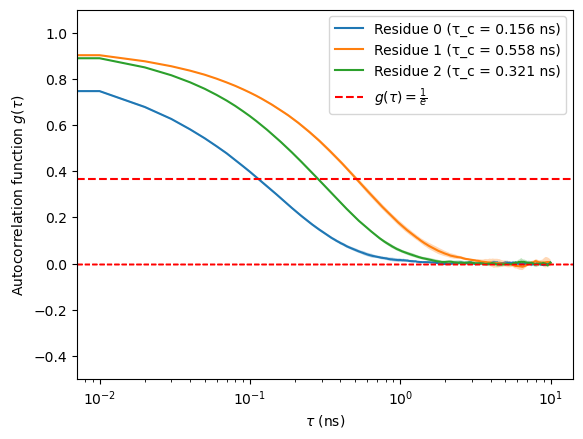

In [55]:
ntau = ee_results_mean.shape[1] # 37002
dt_in_ns = 0.010  # 10 ps per step (converted to ns)
time_to_plot = 10 # in ns 
Nmax = int(time_to_plot / dt_in_ns)  # Convert ns to index\
time = np.arange(Nmax) * dt_in_ns  # Time array in ns

plt.figure()

for res in range(nres):
    mean = ee_results_mean[res][:Nmax]
    std = ee_results_std[res][:Nmax]
    # Calculate tau_c
    tau_c = np.sum(mean) * dt_in_ns
    label = f'Residue {res} (τ_c = {tau_c:.3f} ns)'

    plt.plot(time, mean, label=label)
    plt.fill_between(time, mean - std, mean + std, alpha=0.3)
    plt.axhline(0, color='red', linestyle='--', linewidth=1)

# Add a red vertical line at 1/e
tau_1e = 1 / np.e  # Compute 1/e
plt.axhline(y=tau_1e, color='r', linestyle='--', label=r'$g(\tau) = \frac{1}{e}$')
plt.ylim(-0.5,1.1)
plt.xlabel(r'$\tau$ (ns)')
plt.xscale('log')  # Change x-axis to log scale
plt.ylabel(r'Autocorrelation function $g(\tau)$')
plt.legend(loc='best')

## HREX

In [59]:
hrex_path = '../HREX/analysis'

# To load it back later
autocorr_results = Data.load(f"{hrex_path}/autocoorel_data/autocoorelation_res.pkl").array_list
autocorr_results.shape

# Compute mean and standard deviation across trials, ignoring NaNs
hrex_results_mean = np.nanmean(autocorr_results, axis=0)  # (nres, max_ntau)
hrex_results_std = np.nanstd(autocorr_results, axis=0)

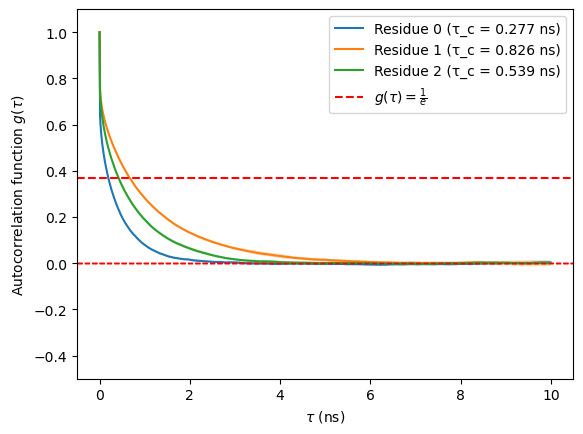

In [62]:
ntau = hrex_results_mean.shape[1] # 37002
dt_in_ns = 0.010  # 10 ps per step (converted to ns)
time_to_plot = 10 # in ns 
Nmax = int(time_to_plot / dt_in_ns)  # Convert ns to index\
time = np.arange(Nmax) * dt_in_ns  # Time array in ns

plt.figure()

for res in range(nres):
    mean = hrex_results_mean[res][:Nmax]
    std = hrex_results_std[res][:Nmax]
    # Calculate tau_c
    tau_c = np.sum(mean) * dt_in_ns
    label = f'Residue {res} (τ_c = {tau_c:.3f} ns)'

    plt.plot(time, mean, label=label)
    plt.fill_between(time, mean - std, mean + std, alpha=0.3)
    plt.axhline(0, color='red', linestyle='--', linewidth=1)

# Add a red vertical line at 1/e
tau_1e = 1 / np.e  # Compute 1/e
plt.axhline(y=tau_1e, color='r', linestyle='--', label=r'$g(\tau) = \frac{1}{e}$')
plt.ylim(-0.5,1.1)
plt.xlabel(r'$\tau$ (ns)')
plt.ylabel(r'Autocorrelation function $g(\tau)$')
plt.legend(loc='best')

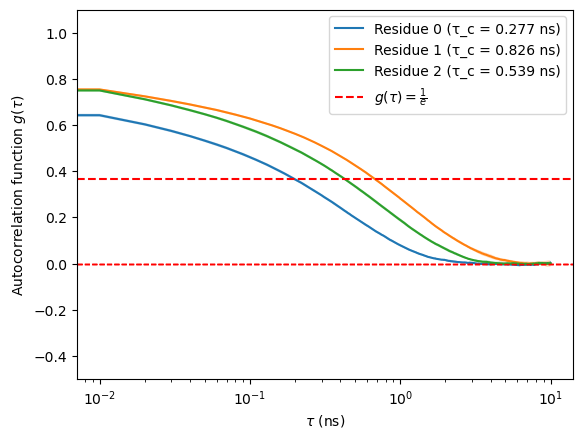

In [65]:
ntau = hrex_results_mean.shape[1] # 37002
dt_in_ns = 0.010  # 10 ps per step (converted to ns)
time_to_plot = 10 # in ns 
Nmax = int(time_to_plot / dt_in_ns)  # Convert ns to index\
time = np.arange(Nmax) * dt_in_ns  # Time array in ns

plt.figure()

for res in range(nres):
    mean = hrex_results_mean[res][:Nmax]
    std = hrex_results_std[res][:Nmax]
    # Calculate tau_c
    tau_c = np.sum(mean) * dt_in_ns
    label = f'Residue {res} (τ_c = {tau_c:.3f} ns)'

    plt.plot(time, mean, label=label)
    plt.fill_between(time, mean - std, mean + std, alpha=0.3)
    plt.axhline(0, color='red', linestyle='--', linewidth=1)

# Add a red vertical line at 1/e
tau_1e = 1 / np.e  # Compute 1/e
plt.axhline(y=tau_1e, color='r', linestyle='--', label=r'$g(\tau) = \frac{1}{e}$')
plt.ylim(-0.5,1.1)
plt.xlabel(r'$\tau$ (ns)')
plt.xscale('log')  # Change x-axis to log scale
plt.ylabel(r'Autocorrelation function $g(\tau)$')
plt.legend(loc='best')

## REDs

In [67]:
reds_path = '../REDs/analysis'

# To load it back later
autocorr_results = Data.load(f"{reds_path}/autocoorel_data/autocoorelation_res.pkl").array_list
autocorr_results.shape

# Compute mean and standard deviation across trials, ignoring NaNs
reds_results_mean = np.nanmean(autocorr_results, axis=0)  # (nres, max_ntau)
reds_results_std = np.nanstd(autocorr_results, axis=0)

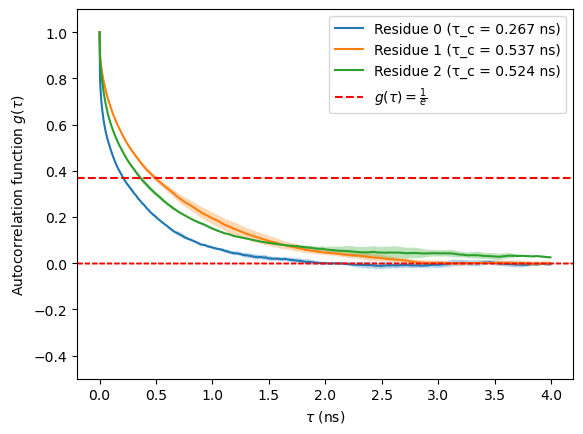

In [79]:
ntau = reds_results_mean.shape[1] # 37002
dt_in_ns = 0.004  # 10 ps per step (converted to ns)
time_to_plot = 4 # in ns 
Nmax = int(time_to_plot / dt_in_ns)  # Convert ns to index\
time = np.arange(Nmax) * dt_in_ns  # Time array in ns

plt.figure()

for res in range(nres):
    mean = reds_results_mean[res][:Nmax]
    std = reds_results_std[res][:Nmax]
    # Calculate tau_c
    tau_c = np.sum(mean) * dt_in_ns
    label = f'Residue {res} (τ_c = {tau_c:.3f} ns)'

    plt.plot(time, mean, label=label)
    plt.fill_between(time, mean - std, mean + std, alpha=0.3)
    plt.axhline(0, color='red', linestyle='--', linewidth=1)

# Add a red vertical line at 1/e
tau_1e = 1 / np.e  # Compute 1/e
plt.axhline(y=tau_1e, color='r', linestyle='--', label=r'$g(\tau) = \frac{1}{e}$')
plt.ylim(-0.5,1.1)
plt.xlabel(r'$\tau$ (ns)')
plt.ylabel(r'Autocorrelation function $g(\tau)$')
plt.legend(loc='best')

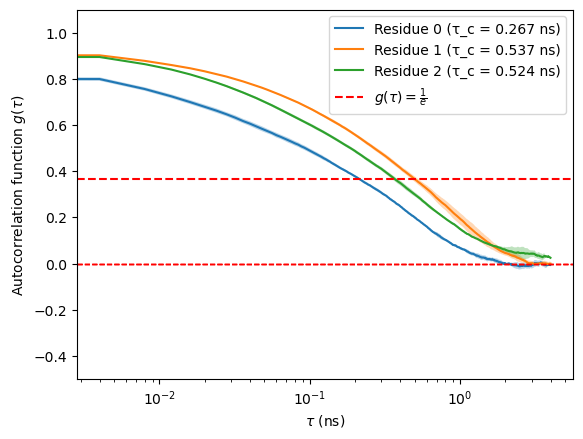

In [78]:
ntau = reds_results_mean.shape[1] # 37002
dt_in_ns = 0.004  # 10 ps per step (converted to ns)
time_to_plot = 4 # in ns 
Nmax = int(time_to_plot / dt_in_ns)  # Convert ns to index\
time = np.arange(Nmax) * dt_in_ns  # Time array in ns

plt.figure()

for res in range(nres):
    mean = reds_results_mean[res][:Nmax]
    std = reds_results_std[res][:Nmax]
    # Calculate tau_c
    tau_c = np.sum(mean) * dt_in_ns
    label = f'Residue {res} (τ_c = {tau_c:.3f} ns)'

    plt.plot(time, mean, label=label)
    plt.fill_between(time, mean - std, mean + std, alpha=0.3)
    plt.axhline(0, color='red', linestyle='--', linewidth=1)

# Add a red vertical line at 1/e
tau_1e = 1 / np.e  # Compute 1/e
plt.axhline(y=tau_1e, color='r', linestyle='--', label=r'$g(\tau) = \frac{1}{e}$')
plt.ylim(-0.5,1.1)
plt.xlabel(r'$\tau$ (ns)')
plt.xscale('log')  # Change x-axis to log scale
plt.ylabel(r'Autocorrelation function $g(\tau)$')
plt.legend(loc='best')

## Combine Plot 

In [118]:
from matplotlib.cm import get_cmap

# Colormap dictionaries for each residue
colormaps = {
    0: get_cmap('spring'),
    1: get_cmap('winter'),
    2: get_cmap('cool')
}

# Define simulation data and metadata
simulations = [
    {
        'name': 'plainMD',
        'mean': plainmd_results_mean,
        'std': plainmd_results_std,
        'dt': 0.010,
        'time_to_plot': min_len * 0.010  # assuming min_len is in frames
    },
    {
        'name': 'EE',
        'mean': ee_results_mean,
        'std': ee_results_std,
        'dt': 0.010,
        'time_to_plot': 10.0
    },
    {
        'name': 'HREX',
        'mean': hrex_results_mean,
        'std': hrex_results_std,
        'dt': 0.010,
        'time_to_plot': 10.0
    },
    {
        'name': 'REDS',
        'mean': reds_results_mean,
        'std': reds_results_std,
        'dt': 0.004,
        'time_to_plot': 10.0
    }
]

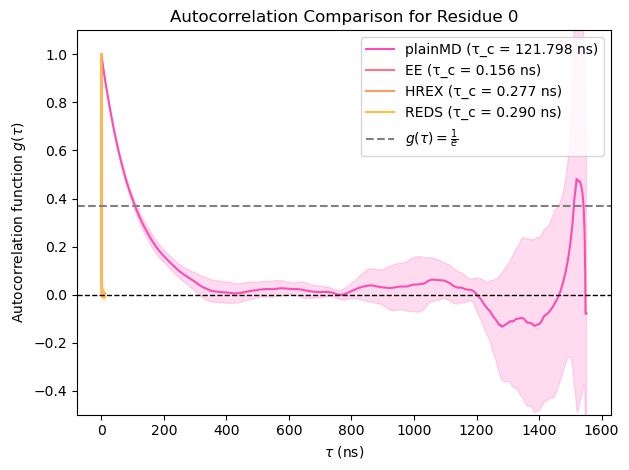

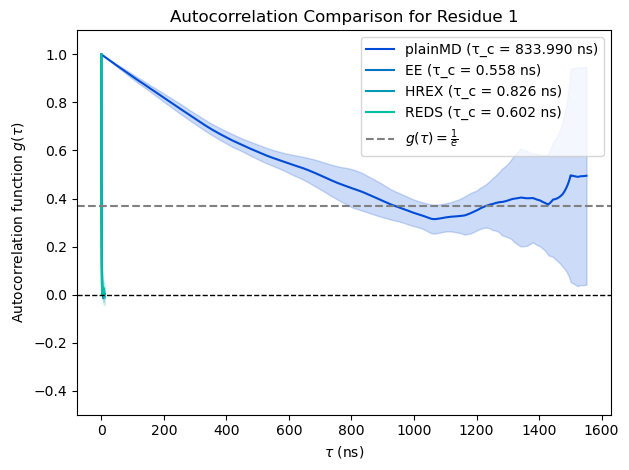

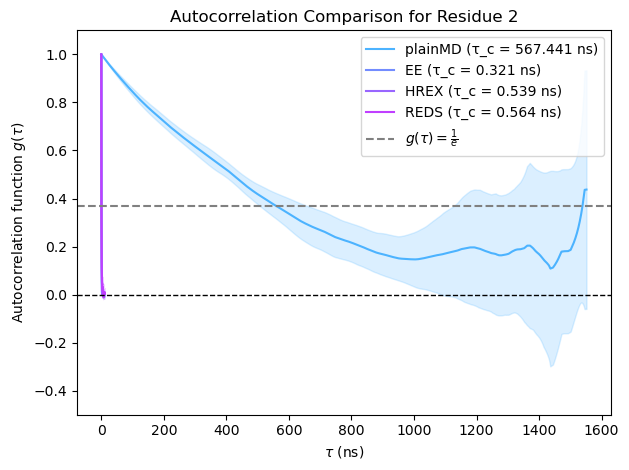

In [119]:
# Plot each residue across all simulations
for res in range(3):  # residue 0, 1, 2
    cmap = colormaps[res]
    plt.figure()

    for i, sim in enumerate(simulations):
        Nmax = int(sim['time_to_plot'] / sim['dt'])
        time = np.arange(Nmax) * sim['dt']
        mean = sim['mean'][res][:Nmax]
        std = sim['std'][res][:Nmax]

        tau_c = np.sum(mean) * sim['dt']
        label = f"{sim['name']} (τ_c = {tau_c:.3f} ns)"

        color = cmap(0.3 + 0.15 * i)  # Different shades per simulation

        plt.plot(time, mean, label=label, color=color)
        plt.fill_between(time, mean - std, mean + std, color=color, alpha=0.2)

    plt.axhline(0, color='black', linestyle='--', linewidth=1)
    plt.axhline(y=1 / np.e, color='gray', linestyle='--', label=r'$g(\tau) = \frac{1}{e}$')

    plt.ylim(-0.5, 1.1)
    plt.xlabel(r'$\tau$ (ns)')
    plt.ylabel(r'Autocorrelation function $g(\tau)$')
    plt.title(f'Autocorrelation Comparison for Residue {res}')
    plt.legend(loc='best')
    plt.tight_layout()

plt.show()

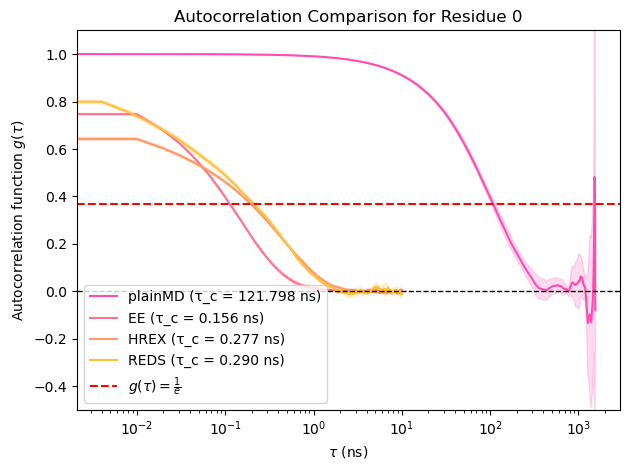

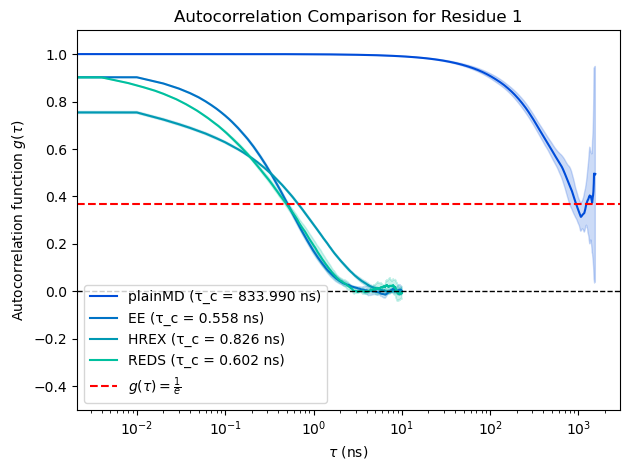

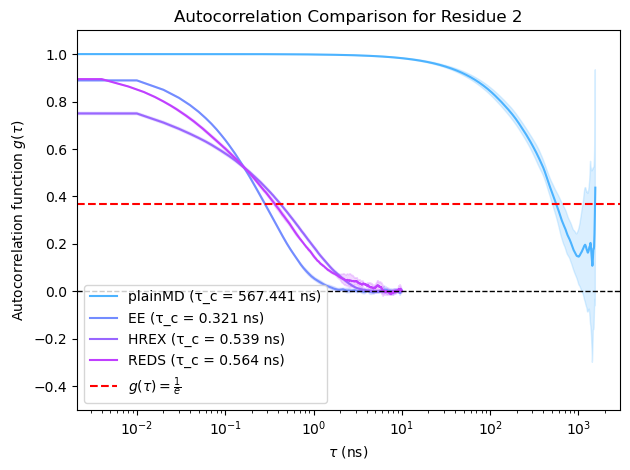

In [120]:
# Plot each residue across all simulations
for res in range(3):  # residue 0, 1, 2
    cmap = colormaps[res]
    plt.figure()

    for i, sim in enumerate(simulations):
        Nmax = int(sim['time_to_plot'] / sim['dt'])
        time = np.arange(Nmax) * sim['dt']
        mean = sim['mean'][res][:Nmax]
        std = sim['std'][res][:Nmax]

        tau_c = np.sum(mean) * sim['dt']
        label = f"{sim['name']} (τ_c = {tau_c:.3f} ns)"

        color = cmap(0.3 + 0.15 * i)  # Different shades per simulation

        plt.plot(time, mean, label=label, color=color)
        plt.fill_between(time, mean - std, mean + std, color=color, alpha=0.2)

    plt.axhline(0, color='black', linestyle='--', linewidth=1)
    plt.axhline(y=1 / np.e, color='red', linestyle='--', label=r'$g(\tau) = \frac{1}{e}$')

    plt.ylim(-0.5, 1.1)
    plt.xlabel(r'$\tau$ (ns)')
    plt.xscale('log')  # Change x-axis to log scale
    plt.ylabel(r'Autocorrelation function $g(\tau)$')
    plt.title(f'Autocorrelation Comparison for Residue {res}')
    plt.legend(loc='best')
    plt.tight_layout()

plt.show()

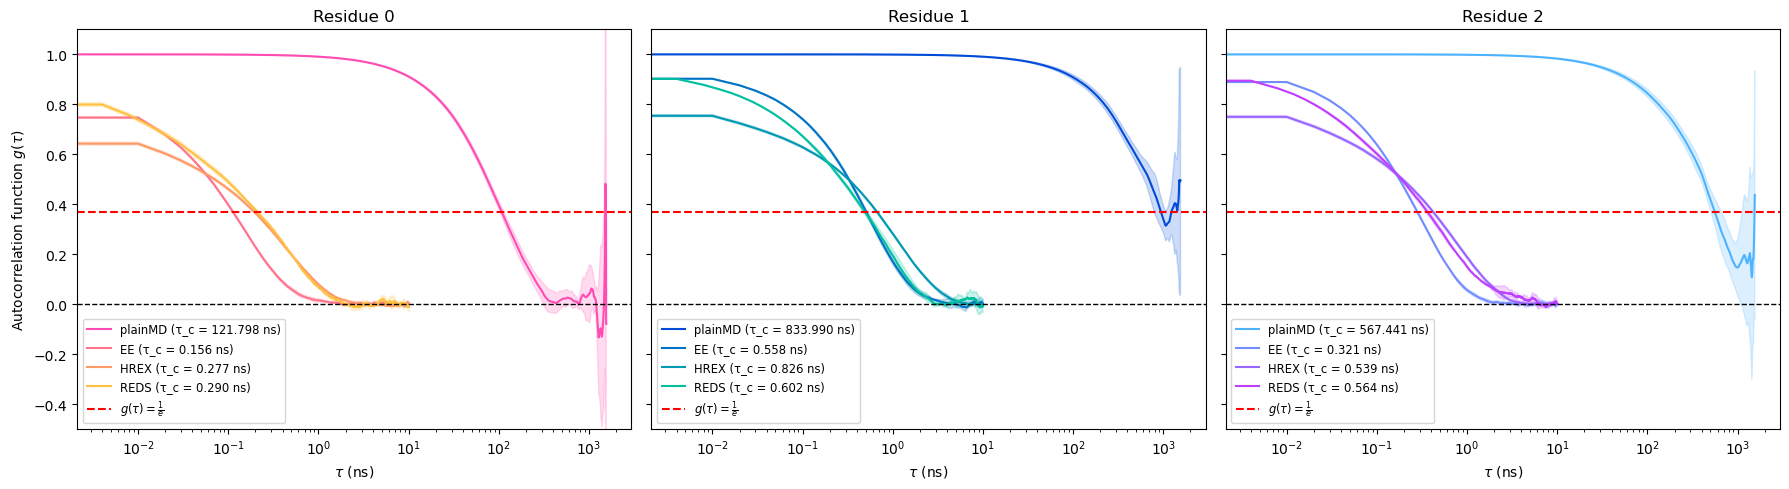

In [121]:
# Set up 1x3 subplot layout
fig, axes = plt.subplots(1, 3, figsize=(18, 5), sharey=True)

for res in range(3):  # residue 0, 1, 2
    ax = axes[res]
    cmap = colormaps[res]

    for i, sim in enumerate(simulations):
        Nmax = int(sim['time_to_plot'] / sim['dt'])
        time = np.arange(Nmax) * sim['dt']
        mean = sim['mean'][res][:Nmax]
        std = sim['std'][res][:Nmax]

        tau_c = np.sum(mean) * sim['dt']
        label = f"{sim['name']} (τ_c = {tau_c:.3f} ns)"
        color = cmap(0.3 + 0.15 * i)

        ax.plot(time, mean, label=label, color=color, alpha=1)
        ax.fill_between(time, mean - std, mean + std, color=color, alpha=0.2)

    ax.axhline(0, color='black', linestyle='--', linewidth=1)
    ax.axhline(y=1 / np.e, color='red', linestyle='--', label=r'$g(\tau) = \frac{1}{e}$')
    ax.set_xscale('log')
    ax.set_ylim(-0.5, 1.1)
    ax.set_xlabel(r'$\tau$ (ns)')
    ax.set_title(f'Residue {res}')

    ax.legend(loc='best', fontsize='small')  # Add legend to each subplot

# Shared Y-label
axes[0].set_ylabel(r'Autocorrelation function $g(\tau)$')

plt.tight_layout()
plt.show()
